In [2]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


🎯 INITIALIZING COMPREHENSIVE THREE-WAY EVALUATION
🚀 STARTING COMPREHENSIVE THREE-WAY EVALUATION
🔄 LOADING ALL MODELS FOR COMPARISON...


tokenizer_config.json:   0%|          | 0.00/1.62k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

📥 Loading Base Model...


config.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/188 [00:00<?, ?B/s]

📥 Loading SFT Model...


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

📥 Loading RFT Model...


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/peft/peft_model.py:585: UserWarning: Found missing adapter keys while loading the checkpoint: ['base_model.model.model.layers.0.self_attn.q_proj.lora_A.default.weight', 'base_model.model.model.layers.0.self_attn.q_proj.lora_B.default.weight', 'base_model.model.model.layers.0.self_attn.k_proj.lora_A.default.weight', 'base_model.model.model.layers.0.self_attn.k_proj.lora_B.default.weight', 'base_model.model.model.layers.0.self_attn.v_proj.lora_A.default.weight', 'base_model.model.model.layers.0.self_attn.v_proj.lora_B.default.weight', 'base_model.model.model.layers.0.self_attn.o_proj.lora_A.default.weight', 'base_model.model.model.layers.0.self_attn.o_proj.lora_B.default.weight', 'base_model.model.model.layers.1.self_attn.q_proj.lora_A.default.weight', 'base_model.model.model.layers.1.self_attn.q_proj.lora_B.default.weight', 'base_model.model.model.layers.1.self_attn.k_proj.lora_A.default.weight', 'base_model.model.model.layers.1.self_attn.k_proj.l

✅ All models loaded successfully!
📊 LOADING TEST DATASETS...
✅ Conceptual: 10 prompts
✅ Financial Math: 5 problems

📊 EVALUATING ON CONCEPTUAL DATASET
----------------------------------------


Processing conceptual: 100%|██████████| 10/10 [10:44<00:00, 64.41s/it]



📊 EVALUATING ON FINANCIAL_MATH DATASET
----------------------------------------


Processing financial_math: 100%|██████████| 5/5 [06:00<00:00, 72.02s/it]
/tmp/ipython-input-4190494348.py:330: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0,0].boxplot(quality_data, labels=['Base', 'SFT', 'RFT'])
/tmp/ipython-input-4190494348.py:336: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0,1].boxplot(length_data, labels=['Base', 'SFT', 'RFT'])



✅ Detailed results saved to: /content/drive/MyDrive/financial_llm/results/comprehensive_three_way_results.csv

📈 GENERATING COMPARISON TABLES FOR PAPER
📊 OVERALL PERFORMANCE SUMMARY:
       quality_score  response_length  word_count  financial_terms  numbers  \
model                                                                         
base           0.803          854.600     138.133            3.933    7.467   
rft            0.830          892.267     149.067            3.667    8.000   
sft            0.857          837.667     139.400            4.933    7.067   

       calculations  sample_count  
model                              
base          8.067            15  
rft           7.667            15  
sft           7.467            15  

📈 DATASET-WISE QUALITY SCORES:
                       mean    std  count
dataset        model                     
conceptual     base   0.705  0.152     10
               rft    0.745  0.167     10
               sft    0.785  0.156     1

/tmp/ipython-input-4190494348.py:349: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1,1].boxplot(financial_data, labels=['Base', 'SFT', 'RFT'])


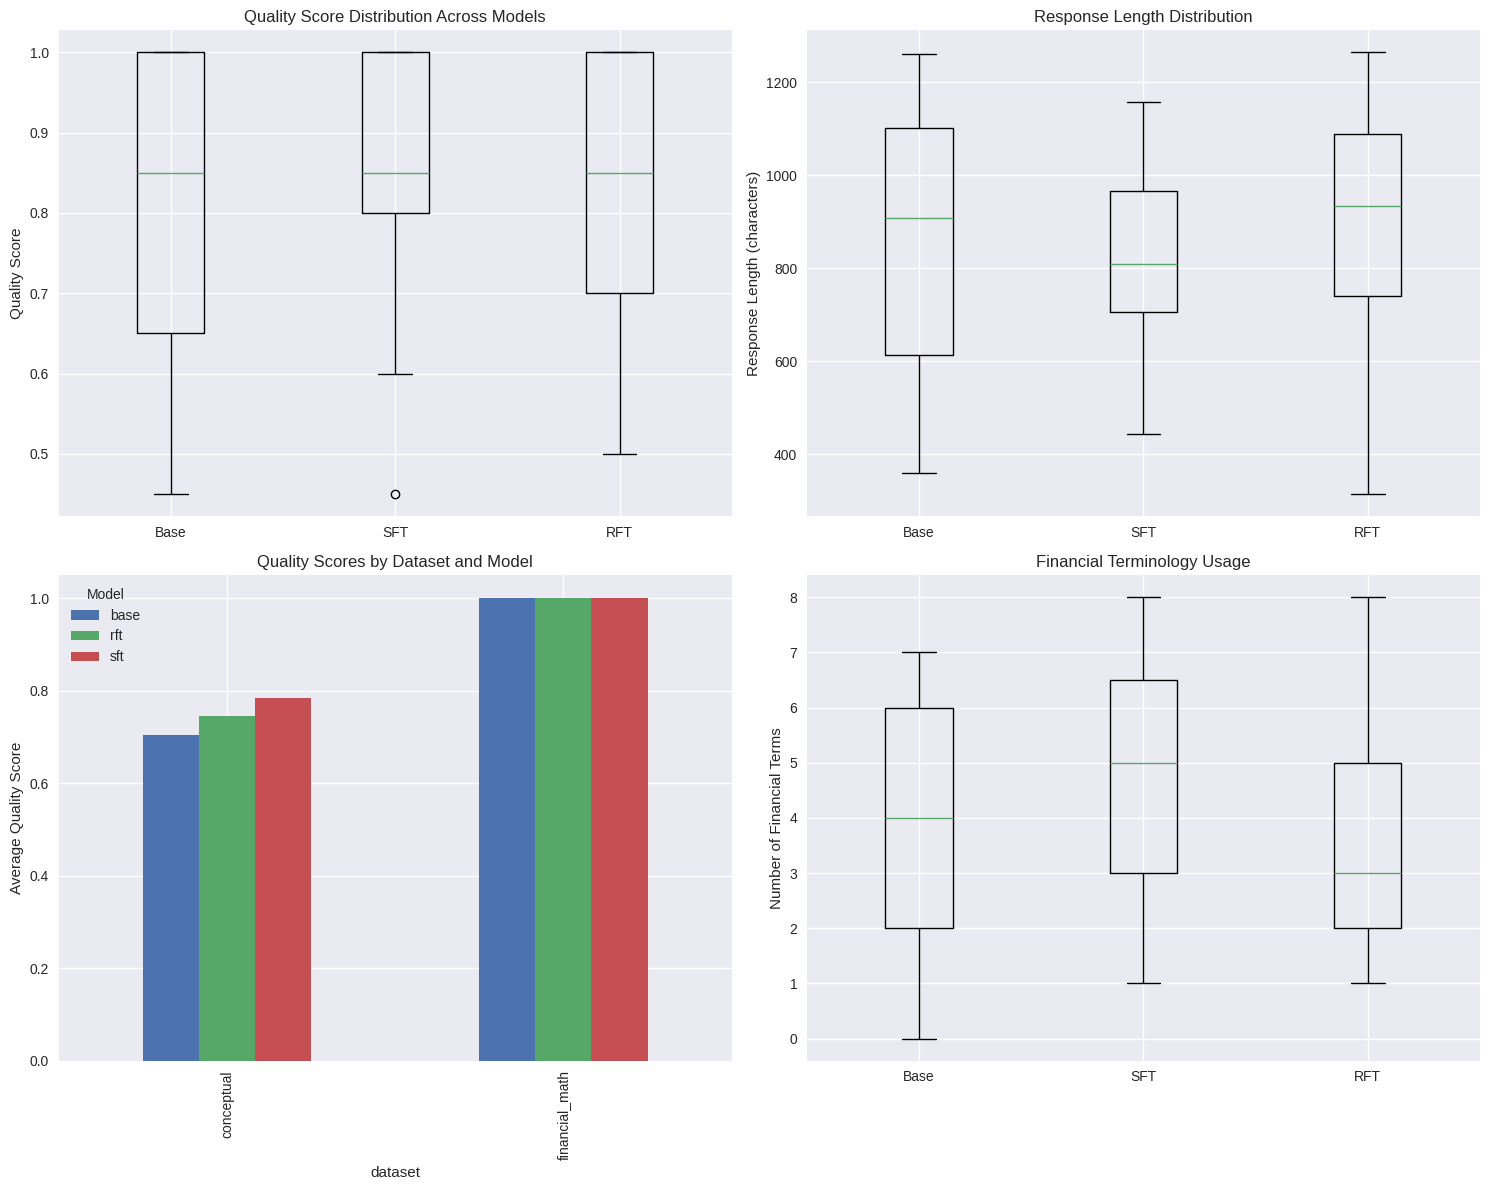

✅ Visualizations saved to: /content/drive/MyDrive/financial_llm/results/comprehensive_comparison_visualizations.png

🎉 COMPREHENSIVE THREE-WAY EVALUATION COMPLETED!
📊 You now have:
   • Detailed results for all three models
   • Statistical significance testing
   • Publication-ready tables and visualizations
   • Fair comparison across identical test conditions


In [3]:
# comprehensive_three_way_evaluation.py

!pip install -q transformers accelerate bitsandbytes peft datasets evaluate
!pip install -q rouge-score bert-score nltk

import torch
import pandas as pd
import json
import numpy as np
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
from peft import PeftModel
from datasets import Dataset
import evaluate
from tqdm import tqdm
import re
from typing import List, Dict, Tuple
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Mount drive and setup
drive.mount('/content/drive')
drive_path = "/content/drive/MyDrive/financial_llm"

class ComprehensiveModelEvaluator:
    def __init__(self):
        self.drive_path = drive_path
        self.base_model_name = "meta-llama/Llama-2-7b-chat-hf"
        self.sft_model_path = f"{self.drive_path}/models/conceptual_sft_model"
        self.rft_model_path = f"{self.drive_path}/models/grpo_compliant_model"

        # Configure quantization for consistent loading
        self.bnb_config = BitsAndBytesConfig(
            load_in_4bit=True,
            bnb_4bit_quant_type="nf4",
            bnb_4bit_compute_dtype=torch.float16,
            bnb_4bit_use_double_quant=True,
        )

        # Load metrics
        self.bleu = evaluate.load("bleu")
        self.rouge = evaluate.load("rouge")
        self.bertscore = evaluate.load("bertscore")

        print("🎯 INITIALIZING COMPREHENSIVE THREE-WAY EVALUATION")
        print("=" * 60)

    def load_all_models(self):
        """Load all three models with identical configurations"""
        print("🔄 LOADING ALL MODELS FOR COMPARISON...")

        # Load tokenizer (same for all models)
        self.tokenizer = AutoTokenizer.from_pretrained(self.base_model_name, trust_remote_code=True)
        if self.tokenizer.pad_token is None:
            self.tokenizer.pad_token = self.tokenizer.eos_token

        models = {}

        # 1. Load Base Model
        print("📥 Loading Base Model...")
        models['base'] = AutoModelForCausalLM.from_pretrained(
            self.base_model_name,
            quantization_config=self.bnb_config,
            device_map="auto",
            trust_remote_code=True,
        )

        # 2. Load SFT Model
        print("📥 Loading SFT Model...")
        base_for_sft = AutoModelForCausalLM.from_pretrained(
            self.base_model_name,
            quantization_config=self.bnb_config,
            device_map="auto",
            trust_remote_code=True,
        )
        models['sft'] = PeftModel.from_pretrained(base_for_sft, self.sft_model_path)

        # 3. Load RFT Model
        print("📥 Loading RFT Model...")
        base_for_rft = AutoModelForCausalLM.from_pretrained(
            self.base_model_name,
            quantization_config=self.bnb_config,
            device_map="auto",
            trust_remote_code=True,
        )
        models['rft'] = PeftModel.from_pretrained(base_for_rft, self.rft_model_path)

        print("✅ All models loaded successfully!")
        return models

    def load_test_datasets(self):
        """Load both conceptual and financial math test datasets"""
        print("📊 LOADING TEST DATASETS...")

        datasets = {}

        # 1. Conceptual Test Data (from your SFT evaluation)
        try:
            with open(f"{self.drive_path}/evaluation_artifacts/test_prompts_complete.json", 'r') as f:
                conceptual_data = json.load(f)
            datasets['conceptual'] = conceptual_data['test_prompts'][:10]  # Use first 10 for quick eval
            print(f"✅ Conceptual: {len(datasets['conceptual'])} prompts")
        except:
            print("⚠️ Using fallback conceptual prompts")
            datasets['conceptual'] = [
                "Explain what compound interest is and how it works.",
                "What is the difference between stocks and bonds?",
                "Describe the concept of risk diversification.",
                "How does inflation affect investments?",
                "What are the main types of financial markets?"
            ]

        # 2. Financial Math Test Data (from GRPO training)
        try:
            with open(f"{self.drive_path}/data/advanced_grpo_training_data.json", 'r') as f:
                grpo_data = json.load(f)
            datasets['financial_math'] = [item['problem'] for item in grpo_data]
            print(f"✅ Financial Math: {len(datasets['financial_math'])} problems")
        except:
            print("⚠️ Using fallback financial math problems")
            datasets['financial_math'] = [
                "Calculate compound interest for $1000 at 5% annual rate for 3 years.",
                "A stock portfolio has 60% in Stock A (beta=1.2) and 40% in Stock B (beta=0.8). What is the portfolio beta?",
                "Calculate the present value of $5000 received 5 years from now with 6% discount rate.",
                "A bond with face value $1000, 5% coupon, 3 years to maturity. Calculate duration.",
                "Portfolio expected return 8%, risk-free rate 2%, standard deviation 12%. Calculate Sharpe ratio."
            ]

        return datasets

    def generate_responses(self, model, prompt: str, model_name: str) -> str:
        """Generate response with consistent parameters across models"""
        inputs = self.tokenizer(prompt, return_tensors="pt").to(model.device)

        with torch.no_grad():
            outputs = model.generate(
                **inputs,
                max_new_tokens=256,
                temperature=0.7,
                do_sample=True,
                pad_token_id=self.tokenizer.eos_token_id,
                repetition_penalty=1.1,
                num_return_sequences=1
            )

        response = self.tokenizer.decode(outputs[0], skip_special_tokens=True)
        generated_response = response[len(prompt):].strip()

        return generated_response

    def calculate_automatic_metrics(self, response: str, reference: str = None) -> Dict:
        """Calculate multiple automatic evaluation metrics"""
        metrics = {}

        if reference:
            # BLEU Score
            try:
                bleu_result = self.bleu.compute(predictions=[response], references=[[reference]])
                metrics['bleu'] = bleu_result['bleu']
            except:
                metrics['bleu'] = 0.0

            # ROUGE Scores
            try:
                rouge_result = self.rouge.compute(predictions=[response], references=[reference])
                metrics['rouge1'] = rouge_result['rouge1']
                metrics['rouge2'] = rouge_result['rouge2']
                metrics['rougeL'] = rouge_result['rougeL']
            except:
                metrics.update({'rouge1': 0.0, 'rouge2': 0.0, 'rougeL': 0.0})

            # BERTScore
            try:
                bert_result = self.bertscore.compute(predictions=[response], references=[reference], lang="en")
                metrics['bertscore_f1'] = sum(bert_result['f1'])/len(bert_result['f1'])
            except:
                metrics['bertscore_f1'] = 0.0

        # Response characteristics (always computable)
        metrics['response_length'] = len(response)
        metrics['word_count'] = len(response.split())
        metrics['sentence_count'] = response.count('.') + response.count('!') + response.count('?')

        # Financial content indicators
        financial_terms = ['interest', 'investment', 'stock', 'bond', 'portfolio', 'risk', 'return',
                          'inflation', 'market', 'financial', 'calculate', 'formula', 'percentage']
        metrics['financial_terms'] = sum(1 for term in financial_terms if term.lower() in response.lower())

        # Mathematical content indicators
        math_indicators = {
            'numbers': len(re.findall(r'\d+\.?\d*', response)),
            'calculations': len(re.findall(r'[=\+\-\*\/\^]', response)),
            'steps': response.count('\n') + 1
        }
        metrics.update(math_indicators)

        return metrics

    def calculate_quality_score(self, response: str, problem_type: str) -> float:
        """Calculate comprehensive quality score"""
        response_lower = response.lower()

        # Content quality (40%)
        content_score = 0.0
        if problem_type == 'financial_math':
            math_indicators = len(re.findall(r'\d+\.?\d*', response)) * 0.1
            calc_indicators = len(re.findall(r'[=\+\-\*\/\^]', response)) * 0.15
            step_indicators = min(response.count('\n') * 0.15, 0.15)
            content_score = math_indicators + calc_indicators + step_indicators
        else:  # conceptual
            financial_terms = ['interest', 'investment', 'stock', 'bond', 'portfolio', 'risk', 'diversification']
            term_count = sum(1 for term in financial_terms if term in response_lower)
            content_score = min(term_count * 0.1, 0.4)

        # Structure quality (30%)
        structure_score = 0.0
        if len(response) >= 50:
            structure_score += 0.15
        if response.count('.') >= 1:
            structure_score += 0.15

        # Readability quality (30%)
        readability_score = 0.0
        words = response.split()
        if len(words) >= 20:
            readability_score += 0.15
        if any(marker in response_lower for marker in ['first', 'second', 'then', 'therefore', 'however']):
            readability_score += 0.15

        total_score = min(content_score + structure_score + readability_score, 1.0)
        return total_score

    def run_comprehensive_evaluation(self):
        """Run complete three-way evaluation"""
        print("🚀 STARTING COMPREHENSIVE THREE-WAY EVALUATION")
        print("=" * 60)

        # Load models and data
        models = self.load_all_models()
        test_datasets = self.load_test_datasets()

        results = []

        for dataset_name, prompts in test_datasets.items():
            print(f"\n📊 EVALUATING ON {dataset_name.upper()} DATASET")
            print("-" * 40)

            for prompt in tqdm(prompts, desc=f"Processing {dataset_name}"):
                for model_name, model in models.items():
                    try:
                        # Generate response
                        response = self.generate_responses(model, prompt, model_name)

                        # Calculate metrics
                        automatic_metrics = self.calculate_automatic_metrics(response)
                        quality_score = self.calculate_quality_score(response, dataset_name)

                        # Store results
                        result_entry = {
                            'dataset': dataset_name,
                            'model': model_name,
                            'prompt': prompt,
                            'response': response,
                            'quality_score': quality_score,
                            **automatic_metrics
                        }
                        results.append(result_entry)

                    except Exception as e:
                        print(f"❌ Error with {model_name} on prompt: {e}")
                        continue

        # Convert to DataFrame
        results_df = pd.DataFrame(results)

        # Save detailed results
        results_path = f"{self.drive_path}/results/comprehensive_three_way_results.csv"
        results_df.to_csv(results_path, index=False)

        print(f"\n✅ Detailed results saved to: {results_path}")
        return results_df

    def generate_comparison_tables(self, results_df):
        """Generate summary tables and visualizations for paper"""
        print("\n📈 GENERATING COMPARISON TABLES FOR PAPER")
        print("=" * 50)

        # 1. Overall Performance Summary
        summary_metrics = ['quality_score', 'response_length', 'word_count', 'financial_terms', 'numbers', 'calculations']

        overall_summary = results_df.groupby('model')[summary_metrics].mean().round(3)
        overall_summary['sample_count'] = results_df.groupby('model').size()

        print("📊 OVERALL PERFORMANCE SUMMARY:")
        print(overall_summary)

        # 2. Dataset-wise Comparison
        dataset_summary = results_df.groupby(['dataset', 'model'])['quality_score'].agg(['mean', 'std', 'count']).round(3)
        print("\n📈 DATASET-WISE QUALITY SCORES:")
        print(dataset_summary)

        # 3. Statistical Significance Testing
        from scipy import stats

        print("\n🔍 STATISTICAL SIGNIFICANCE TESTING:")
        models = ['base', 'sft', 'rft']
        for i, model1 in enumerate(models):
            for j, model2 in enumerate(models):
                if i < j:
                    scores1 = results_df[results_df['model'] == model1]['quality_score']
                    scores2 = results_df[results_df['model'] == model2]['quality_score']
                    t_stat, p_value = stats.ttest_ind(scores1, scores2)
                    print(f"{model1.upper()} vs {model2.upper()}: p-value = {p_value:.4f} {'***' if p_value < 0.001 else '**' if p_value < 0.01 else '*' if p_value < 0.05 else 'ns'}")

        # Save summary tables
        overall_summary.to_csv(f"{self.drive_path}/results/overall_performance_summary.csv")
        dataset_summary.to_csv(f"{self.drive_path}/results/dataset_wise_summary.csv")

        return overall_summary, dataset_summary

    def create_visualizations(self, results_df):
        """Create publication-ready visualizations"""
        print("\n🎨 CREATING VISUALIZATIONS...")

        plt.style.use('seaborn-v0_8')
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))

        # 1. Quality Score Comparison
        quality_data = [results_df[results_df['model'] == model]['quality_score'] for model in ['base', 'sft', 'rft']]
        axes[0,0].boxplot(quality_data, labels=['Base', 'SFT', 'RFT'])
        axes[0,0].set_title('Quality Score Distribution Across Models')
        axes[0,0].set_ylabel('Quality Score')

        # 2. Response Length Comparison
        length_data = [results_df[results_df['model'] == model]['response_length'] for model in ['base', 'sft', 'rft']]
        axes[0,1].boxplot(length_data, labels=['Base', 'SFT', 'RFT'])
        axes[0,1].set_title('Response Length Distribution')
        axes[0,1].set_ylabel('Response Length (characters)')

        # 3. Dataset-wise Performance
        dataset_quality = results_df.groupby(['dataset', 'model'])['quality_score'].mean().unstack()
        dataset_quality.plot(kind='bar', ax=axes[1,0])
        axes[1,0].set_title('Quality Scores by Dataset and Model')
        axes[1,0].set_ylabel('Average Quality Score')
        axes[1,0].legend(title='Model')

        # 4. Financial Content Comparison
        financial_data = [results_df[results_df['model'] == model]['financial_terms'] for model in ['base', 'sft', 'rft']]
        axes[1,1].boxplot(financial_data, labels=['Base', 'SFT', 'RFT'])
        axes[1,1].set_title('Financial Terminology Usage')
        axes[1,1].set_ylabel('Number of Financial Terms')

        plt.tight_layout()
        viz_path = f"{self.drive_path}/results/comprehensive_comparison_visualizations.png"
        plt.savefig(viz_path, dpi=300, bbox_inches='tight')
        plt.show()

        print(f"✅ Visualizations saved to: {viz_path}")

def main():
    """Run complete three-way evaluation"""
    evaluator = ComprehensiveModelEvaluator()

    try:
        # Run comprehensive evaluation
        results_df = evaluator.run_comprehensive_evaluation()

        # Generate comparison tables
        overall_summary, dataset_summary = evaluator.generate_comparison_tables(results_df)

        # Create visualizations
        evaluator.create_visualizations(results_df)

        print("\n🎉 COMPREHENSIVE THREE-WAY EVALUATION COMPLETED!")
        print("📊 You now have:")
        print("   • Detailed results for all three models")
        print("   • Statistical significance testing")
        print("   • Publication-ready tables and visualizations")
        print("   • Fair comparison across identical test conditions")

    except Exception as e:
        print(f"❌ Evaluation failed: {e}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    main()